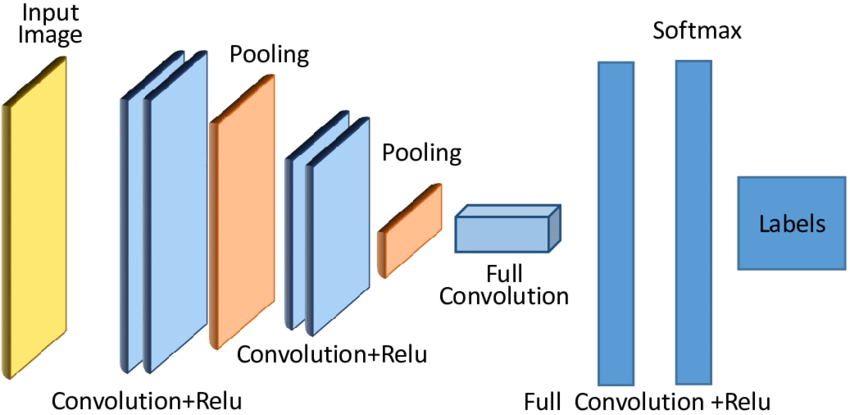

# 1.Convolutional Layers – For feature extraction.
# 2.Pooling Layers – For dimensionality reduction.
# 3.Fully Connected Layers (Dense) – For final classification.

# Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np


# Load and prepare dataset

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3), Labels: (50000, 1)


# Build the CNN Model

# 1.Convolutional Layer (Conv2D) – Extracts spatial features using filters.
# 2.Pooling Layer (MaxPooling2D) – Reduces spatial dimensions and computation.
# 3.Fully Connected Layer (Dense) – Classifies the extracted features.

In [ ]:
model = models.Sequential()

# 1. First Convolutional + Pooling Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2. Second Convolutional + Pooling Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3. Third Convolutional Layer (without pooling to retain features)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the output to feed it into the Fully Connected layers
model.add(layers.Flatten())

# 4. Fully Connected Layers (Dense)
model.add(layers.Dense(128, activation='relu'))  # Hidden Layer
model.add(layers.Dense(10, activation='softmax'))  # Output Layer (10 classes)

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the CNN model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - accuracy: 0.3319 - loss: 1.8016 - val_accuracy: 0.5208 - val_loss: 1.3302
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.5416 - loss: 1.2746 - val_accuracy: 0.5944 - val_loss: 1.1517
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.6179 - loss: 1.0791 - val_accuracy: 0.6459 - val_loss: 1.0196
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.6652 - loss: 0.9531 - val_accuracy: 0.6752 - val_loss: 0.9423
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 108ms/step - accuracy: 0.7018 - loss: 0.8556 - val_accuracy: 0.6743 - val_loss: 0.9456
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.7248 - loss: 0.7831 - val_accuracy: 0.6816 - val_loss: 0.9246
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.7435 - loss: 0.7244 - val_accuracy: 0.7051 - val_loss: 0.8473
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.7652 - loss: 0.

# Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 4s - 13ms/step - accuracy: 0.7139 - loss: 0.8607
Test Accuracy: 71.39%
